In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [ ]:
import torch 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

In [ ]:
# for speechbrain
!pip install -qq torch==1.11.0 torchvision==0.12.0 torchaudio==0.11.0 torchtext==0.12.0
!pip install -qq speechbrain==0.5.12

# pyannote.audio
!pip install -qq pyannote.audio
!pip install audio2numpy
# for visualization purposes
!pip install -qq moviepy ipython==7.34.0

!pip install pydub
!pip install transformers
!pip install pyctcdecode
!pip install pypi-kenlm

     |████████████████████████████████| 750.6 MB 11 kB/s 
     |████████████████████████████████| 21.0 MB 1.2 MB/s 
     |████████████████████████████████| 2.9 MB 51.3 MB/s 
     |████████████████████████████████| 10.4 MB 53.4 MB/s 
     |████████████████████████████████| 496 kB 34.2 MB/s 
     |████████████████████████████████| 1.2 MB 49.0 MB/s 
     |████████████████████████████████| 101 kB 11.9 MB/s 
     |████████████████████████████████| 596 kB 52.1 MB/s 
     |████████████████████████████████| 109 kB 2.8 MB/s 
     |████████████████████████████████| 546 kB 46.3 MB/s 
     |████████████████████████████████| 385 kB 24.6 MB/s 
     |████████████████████████████████| 47 kB 6.3 MB/s 
     |████████████████████████████████| 65 kB 5.3 MB/s 
     |████████████████████████████████| 111 kB 60.3 MB/s 
     |████████████████████████████████| 51 kB 192 kB/s 
     |████████████████████████████████| 41 kB 532 kB/s 
     |████████████████████████████████| 129 kB 59.6 MB/s 
     |████████████████

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
audio_file = '/content/drive/My Drive/Audio - Speech/Speaker recognition/split_audio lll.wav'
#AUDIO TIENE QUE ESTAR EN FORMATO WAV, EN 16KHZ Y EN MONO. SINO VA A ROMPER
# divide en períodos de 20 milisegundos. 

Mounted at /content/drive


In [ ]:
#PARA ESCUCHARLO

# from pyannote.audio import Audio 
# from IPython.display import Audio as IPythonAudio
# from pyannote.core import Segment, notebook
# EXCERPT = Segment(0, 30)
# waveform, sr = Audio().crop(audio_file, EXCERPT)

In [ ]:
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained('pyannote/speaker-diarization') 
diarization = pipeline(audio_file, num_speakers=2)

Downloading:   0%|          | 0.00/598 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/318 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129k [00:00<?, ?B/s]

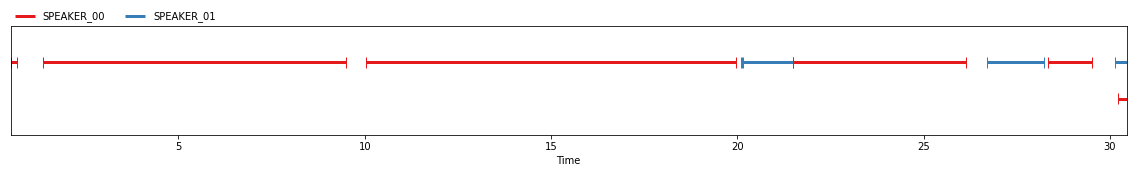

In [ ]:
diarization

In [ ]:
from pydub import AudioSegment

#SEGMENTO SPEAKERS
segmentos_speaker_0=[]
segmentos_speaker_1=[]
for turn, _, speaker in diarization.itertracks(yield_label=True):
  if speaker=='SPEAKER_00':
    segmentos_speaker_0.append([turn.start*1000,turn.end*1000])
  else:
    segmentos_speaker_1.append([turn.start*1000,turn.end*1000])

a = AudioSegment.from_wav(audio_file)
s_inicial = AudioSegment.silent(0) #tiempo máximo del audio
s1 = AudioSegment.silent(segmentos_speaker_0[-1][1]) #tiempo máximo del audio
contador=0
final_audio_speaker1=s_inicial
final_audio_speaker0=s_inicial
aux_0=0
aux_1=0

for i,j in segmentos_speaker_0:
  if aux_0!=0:
    final_audio_speaker0=final_audio_speaker0+s1[f_anterior_0:i]+a[i:j]
  else:
    final_audio_speaker0=s1[0:i]+a[i:j]
  f_anterior_0=j
  aux_0=aux_0+1

for i,j in segmentos_speaker_1:
  if aux_1!=0:
    final_audio_speaker1=final_audio_speaker1+s1[f_anterior_1:i]+a[i:j]
  else:
    final_audio_speaker1=s1[0:i]+a[i:j]
  f_anterior_1=j
  aux_1=aux_1+1


  # Modifico formato para correrle speech to text
import numpy as np
sample_0=final_audio_speaker0.get_array_of_samples()
sample_0 = np.array(sample_0)
sample_0 = sample_0.astype('float')

sample_1=final_audio_speaker1.get_array_of_samples()
sample_1 = np.array(sample_1)
sample_1 = sample_1.astype('float')

In [ ]:
final_audio_speaker1

In [ ]:
# SPEECH TO TEXT

In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from transformers import Wav2Vec2CTCTokenizer,Wav2Vec2FeatureExtractor

modelo="jonatasgrosman/wav2vec2-large-xlsr-53-spanish" #"patrickvonplaten/wav2vec2-large-xlsr-53-spanish-with-lm" #"jonatasgrosman/wav2vec2-large-xlsr-53-spanish"
model = Wav2Vec2ForCTC.from_pretrained(modelo)
# model = Wav2Vec2ForCTC.from_pretrained(modelo).to("cuda")
processor = Wav2Vec2Processor.from_pretrained(modelo)
processor = Wav2Vec2Processor.from_pretrained(modelo).to("cuda")




from transformers import Wav2Vec2ProcessorWithLM
processor = Wav2Vec2ProcessorWithLM.from_pretrained(modelo)

Downloading:   0%|          | 0.00/248 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/78.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.34M [00:00<?, ?B/s]

In [ ]:
# import audio2numpy as a2n
# audio_file2=(a2n.audio_from_file(audio_file))

In [ ]:
inputs_0 = processor(sample_0, sampling_rate=16_000, return_tensors="pt")
import torch
with torch.no_grad():
  logits_0 = model(**inputs_0).logits


inputs_1 = processor(sample_1, sampling_rate=16_000, return_tensors="pt")
with torch.no_grad():
  logits_1 = model(**inputs_1).logits

In [ ]:
seg=4
transcription = processor.batch_decode(np.array([logits_0.numpy()[0][0:50*seg]])).text #Sirve para processor Wav2Vec2ProcessorWithLM. Aca busca entre los fonemas de mayor probabilidad, los que mejor combinen
transcription[0].lower()

# entre cada tiempo del speaker0, si hay más de 5 segundos y habla el otro speaker, se le pone una marca

'señor ruben pero yo lo llamo estimado a'

In [ ]:
seg=4
transcription = processor.batch_decode(np.array([logits_1.numpy()[0][0:50*seg]])).text #Sirve para processor Wav2Vec2ProcessorWithLM. Aca busca entre los fonemas de mayor probabilidad, los que mejor combinen
transcription[0].lower()

''